In [10]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

In [11]:
path = "/content/drive/MyDrive/red_wine.csv"
red_wine_data = pd.read_csv(path)

In [12]:
# QUESTION 1 - getting the html report of the dataset overview
from pandas_profiling import ProfileReport
overview = ProfileReport(red_wine_data)
overview.to_file(output_file="red wine data overview.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
# QUESTION 2 - the result (Accuracy & Mean) of all the models in table format on red wine dataset
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset into a pandas DataFrame
path = "/content/drive/MyDrive/red_wine.csv"
df = pd.read_csv(path)

# Split the dataset into input features and target variable
X = df.drop('type', axis=1)
y = df['type']

# Define the machine learning models to evaluate
models = {
    'Zero R': DummyClassifier(strategy='most_frequent'),
    'One R': DecisionTreeClassifier(max_depth=1),
    'Logistic regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier() 
}

# Initialize lists to hold the model names and their corresponding accuracy and AUC scores
model_names = []
accuracy_means = []
accuracy_stds = []
auc_means = []
auc_stds = []

# Evaluate each model using 10-fold cross-validation and calculate the accuracy and AUC metrics
for name, model in models.items():
    cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    cv_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

    # Append the results to the lists
    model_names.append(name)
    accuracy_means.append(cv_accuracy.mean() * 100)
    accuracy_stds.append(cv_accuracy.std() * 100)
    auc_means.append(cv_auc.mean())
    auc_stds.append(cv_auc.std())

# Create a pandas DataFrame to hold the results
results_df = pd.DataFrame({
    'Model': model_names,
    'AUC': auc_means,
    'Accuracy': accuracy_means    
})

# Format the Accuracy Mean and Accuracy Std columns to display percentages with 2 decimal places
results_df['Accuracy'] = results_df['Accuracy'].map('{:.2f}%'.format)


# Print the results
print(results_df.to_string(index=False))


              Model      AUC Accuracy
             Zero R 0.500000   52.89%
              One R 0.802581   79.88%
Logistic regression 0.879902   78.48%
        Naive Bayes 0.895408   82.16%
      Decision Tree 0.741462   75.50%
                SVM 0.868920   53.58%
      Random Forest 0.889670   80.23%


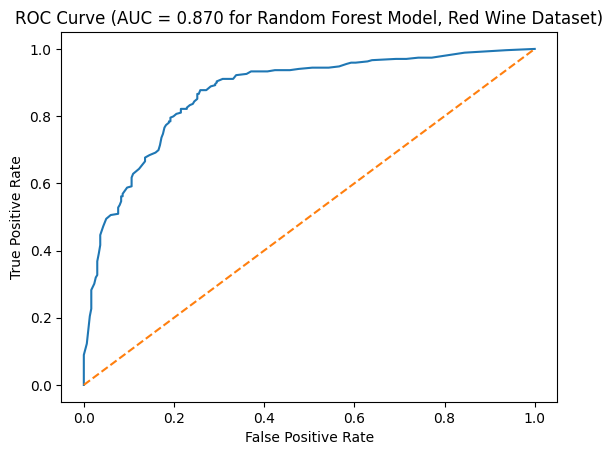

Accuracy: 0.797
AUC Score: 0.870


In [27]:
# QUESTION 3 - ROC curve of the Random Forest classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Load the red-wine.csv dataset
path = "/content/drive/MyDrive/red_wine.csv"
data = pd.read_csv(path)

# Convert the 'quality' column to numeric labels
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Separate the features and target variable
X = data.drop('type', axis=1)
y = data['type']

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Perform 10-fold cross-validation and predict probabilities
y_prob = cross_val_predict(rf, X, y, cv=10, method='predict_proba')

# Calculate the AUC score
auc_score = roc_auc_score(y, y_prob[:, 1])

# Calculate the ROC curve and plot it
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f} for Random Forest Model, Red Wine Dataset)'.format(auc_score))
plt.show()

# Calculate the accuracy
y_pred = np.argmax(y_prob, axis=1)
accuracy = accuracy_score(y, y_pred)

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("AUC Score: {:.3f}".format(auc_score))




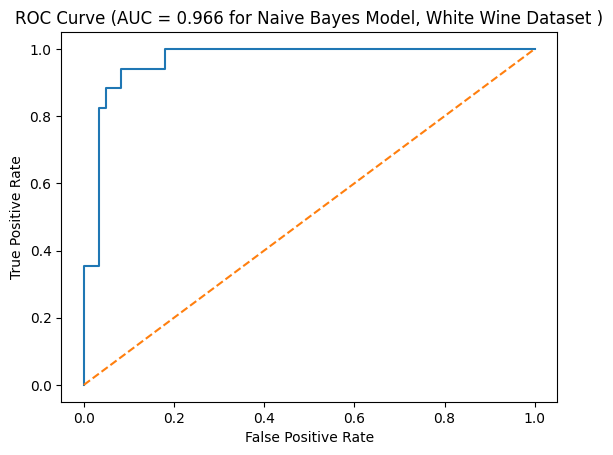

Accuracy: 0.936
AUC Score: 0.966


In [29]:
# QUESTION - 4: ROC Curve AUC for Naive Bayes Model, White Wine Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Load the white-wine.csv dataset
path="/content/drive/MyDrive/white_wine.csv"
data = pd.read_csv(path)

# Convert the 'quality' column to numeric labels
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Separate the features and target variable
X = data.drop('type', axis=1)
y = data['type']

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Perform 10-fold cross-validation and predict probabilities
y_prob = cross_val_predict(nb, X, y, cv=10, method='predict_proba')

# Calculate the AUC score
auc_score = roc_auc_score(y, y_prob[:, 1])

# Calculate the ROC curve and plot it
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f} for Naive Bayes Model, White Wine Dataset )'.format(auc_score))
plt.show()

# Calculate the accuracy
y_pred = np.argmax(y_prob, axis=1)
accuracy = accuracy_score(y, y_pred)

# Print the results
print("Accuracy: {:.3f}".format(accuracy))
print("AUC Score: {:.3f}".format(auc_score))


